In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pll
%matplotlib inline
from datetime import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [2]:
df  = pd.read_csv('airline-passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True)

In [4]:
df = df.set_index('Month')
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [10]:
df.isnull().sum()

Passengers    0
dtype: int64

In [11]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


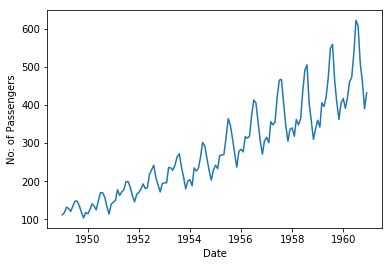

In [5]:
pll.xlabel('Date')
pll.ylabel('No: of Passengers')
pll.plot(df)

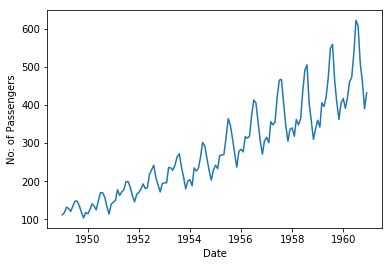

In [6]:
plt.xlabel('Date')
plt.ylabel('No: of Passengers')
plt.plot(df)

In [12]:
import seaborn as sns

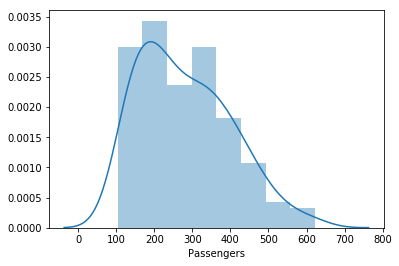

In [20]:
sns.distplot(df['Passengers'])

In [22]:
# Determining Rolling Statistics to check the Stationarity
# Window has been given 12 because we taking it month wise , if we want day-wise then we can give window = 365 etc.
# Here we can see in the output as Nan's because it has taken the average of all the 11 months and has been given to the 12th
# month
# We can see the same pattern of average provided for the mean and the standard deviation

rolmean = df.rolling(window=12).mean()

rolstd = df.rolling(window=12).std()

print(rolmean,rolstd)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01  126.666667
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
1950-04-01  128.833333
1950-05-01  129.166667
1950-06-01  130.333333
1950-07-01  132.166667
1950-08-01  134.000000
1950-09-01  135.833333
1950-10-01  137.000000
1950-11-01  137.833333
1950-12-01  139.666667
1951-01-01  142.166667
1951-02-01  144.166667
1951-03-01  147.250000
1951-04-01  149.583333
1951-05-01  153.500000
1951-06-01  155.916667
...                ...
1958-07-01  376.333333
1958-08-01  379.500000
1958-09-01  379.500000
1958-10-01  380.500000
1958-11-01  380.916667
1958-12-01  381.000000
1959-01-01  382.666667
1959-02-01  384.666667
1959-03-01  388.333333
1959-04-01  392.333333
1959-05-01 

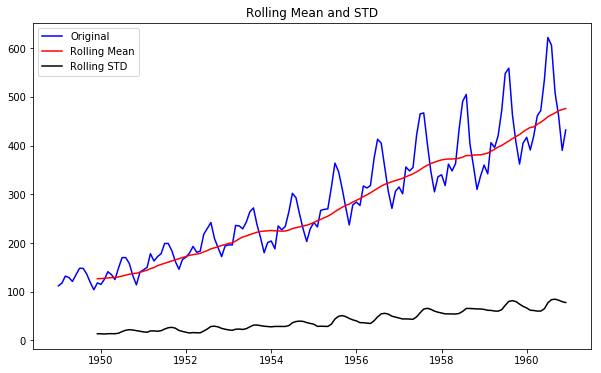

In [48]:
# Plotting the rolling statistics

rcParams['figure.figsize'] = 10,6
orig = pll.plot(df, color='blue', label='Original')
mean = pll.plot(rolmean, color='red', label='Rolling Mean')
std = pll.plot(rolstd, color='black', label='Rolling STD')
pll.legend(loc='best')
pll.title("Rolling Mean and STD")
pll.show(block=False)

In [35]:
# Perform the Dickey-Fuller Test

# AIC is a Caiche Information Criterion
# AIC gives the information about what we want in the time series, the exact value , the actual value and it analyses the 
# difference between them
# It gives a  metrics

from statsmodels.tsa.stattools import adfuller

print("Result of Dickey-FUller Test")

dftest = adfuller(df['Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','P-Value','Lags Used','No: of Observations Used'])

for key,value in dftest[4].items():
    dfoutput["Critical Values are %s"%key] = value

print(dfoutput)

Result of Dickey-FUller Test
Test Statistics               0.815369
P-Value                       0.991880
Lags Used                    13.000000
No: of Observations Used    130.000000
Critical Values are 1%       -3.481682
Critical Values are 5%       -2.884042
Critical Values are 10%      -2.578770
dtype: float64


So here the P-Value is higher than 0.5 and also the Critical Value should be higher than Test-Statistics, So we cannot reject the null hypothesis .So we can say that The Data is not Stationary.

Since From the Dickey-Fuller Test We get to know that the data is not Stationary. So we will estimate the Trend

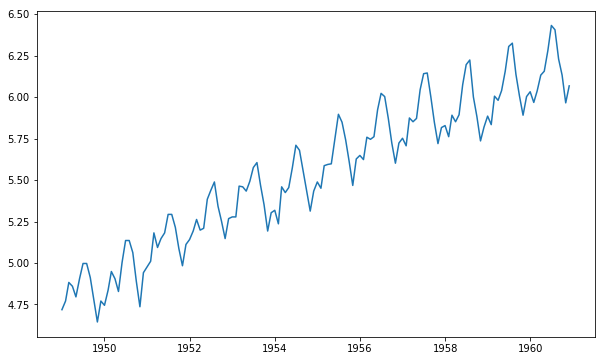

In [36]:
# Estimating the Trend

df_log = np.log(df)
pll.plot(df_log)

C:\Users\JH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


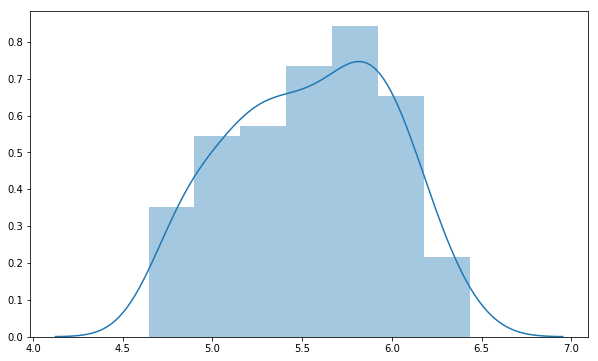

In [37]:
sns.distplot(df_log)

 ### So let's Calculate the moving average with the same window as before

In [38]:
# Moving Average by Rolling Window

rolmean_log = df_log.rolling(window=12).mean()

rolstd_log = df_log.rolling(window=12).std()

print(rolmean_log,rolstd_log)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01    4.836178
1950-01-01    4.838381
1950-02-01    4.843848
1950-03-01    4.849344
1950-04-01    4.853133
1950-05-01    4.855843
1950-06-01    4.864066
1950-07-01    4.875614
1950-08-01    4.887163
1950-09-01    4.899658
1950-10-01    4.908927
1950-11-01    4.916578
1950-12-01    4.930824
1951-01-01    4.950141
1951-02-01    4.964670
1951-03-01    4.984089
1951-04-01    4.999795
1951-05-01    5.026394
1951-06-01    5.041214
...                ...
1958-07-01    5.919627
1958-08-01    5.926146
1958-09-01    5.926146
1958-10-01    5.928980
1958-11-01    5.930335
1958-12-01    5.930582
1959-01-01    5.935346
1959-02-01    5.941409
1959-03-01    5.950968
1959-04-01    5.961736
1959-05-01 

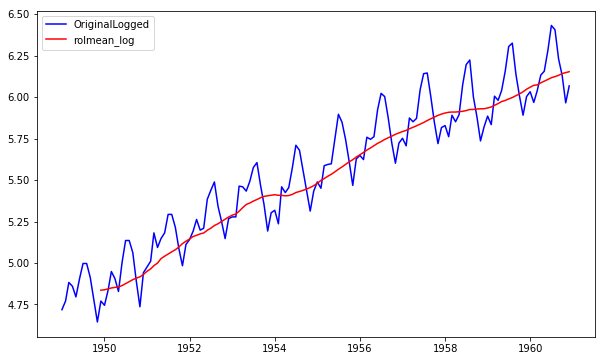

In [44]:
# Plotting those Values

pll.plot(df_log, color='blue', label='OriginalLogged')
pll.plot(rolmean_log, color='red', label='rolmean_log')
#pll.plot(rolstd_log, color='black', label='rolstd_log')
pll.legend(loc='best')
pll.show()

In [52]:

dftest_log = adfuller(df_log['Passengers'], autolag='AIC')

dfoutput_log = pd.Series(dftest_log[0:4],index=['Test Statistics','P-Value','Lags Used','No: of Observations Used'])

for key,value in dftest_log[4].items():
    dfoutput_log["Critical Values are %s"%key] = value

print(dfoutput_log)

Test Statistics              -1.717017
P-Value                       0.422367
Lags Used                    13.000000
No: of Observations Used    130.000000
Critical Values are 1%       -3.481682
Critical Values are 5%       -2.884042
Critical Values are 10%      -2.578770
dtype: float64


This is also not stationary as we can see , the Trend is still going up. 
So We are Trying the formula logged data - logged moving average value and is trying to make it Stationary. 
So it totally depends on the data and what we have to do , we can also go for the square of that , cube of the values etc.
But here we are going with the log value.

In [40]:
dflogscaleminusmovingaverage = df_log - rolmean_log

dflogscaleminusmovingaverage.head(10)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [41]:
# Removing null values

dflogscaleminusmovingaverage.dropna(inplace=True)
dflogscaleminusmovingaverage.head(10)

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


Here we are going to define a function for easy use for the Dickey-Fuller test. So that we can call that function and can see the result for others till the data becomes Stationary. 

In [49]:
from statsmodels.tsa.stattools import adfuller

def test_Stationary(timeseries):
    rolmean_log = timeseries.rolling(window=12).mean()
    rolstd_log = timeseries.rolling(window=12).std()
    
    # PLotting the Rolling Statistics
    rcParams['figure.figsize'] = 10,6
    orig = pll.plot(timeseries, color='blue', label='Original')
    mean = pll.plot(rolmean_log, color='red', label='Rolling Mean')
    std = pll.plot(rolstd_log, color='black', label='Rolling STD')
    pll.legend(loc='best')
    pll.title("Rolling Mean and STD")
    pll.show(block=False)
    
    # Perform Dickey-Fuller Test
    
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','P-Value','Lags Used','No: of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput["Critical Values are %s"%key] = value
    print(dfoutput)

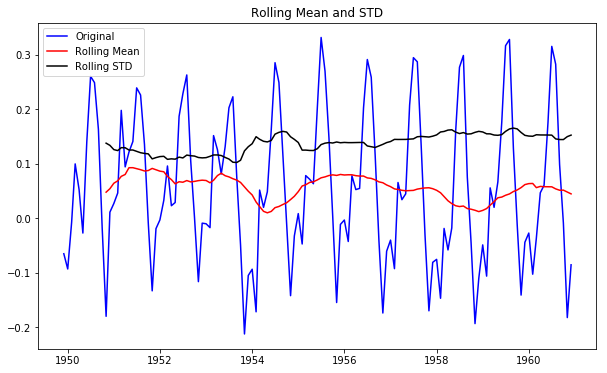

Test Statistics              -3.162908
P-Value                       0.022235
Lags Used                    13.000000
No: of Observations Used    119.000000
Critical Values are 1%       -3.486535
Critical Values are 5%       -2.886151
Critical Values are 10%      -2.579896
dtype: float64


In [50]:
test_Stationary(dflogscaleminusmovingaverage)

Here we can see the P-value becomes less than 5% as 2.2% and the critical values are higher or almost equal to Test Statistics.
And Here we can see there is no Trend happening in it. So we can say that it has become stationary.
So now we will calculate the Weighted average of Time Series. Because I have to see In this how the Trend looks-like.

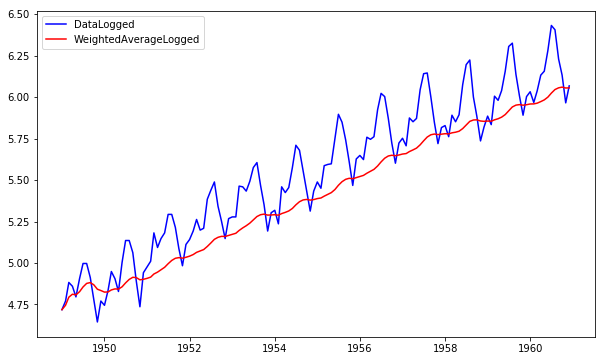

In [54]:
exponentialdecayweightedaverage = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()

pll.plot(df_log, color='blue', label='DataLogged')
pll.plot(exponentialdecayweightedaverage, color='red', label='WeightedAverageLogged')
pll.legend(loc='best')
pll.show()

So here we can see that, as the time series is progressing, the average is also increasing. ie; the Trend is upward and keeps on increasing with respect to time. 

Now we will see the data by substracting the logged data from the weighted exponential average that is the weighted mean and will plot and see the stationarity.

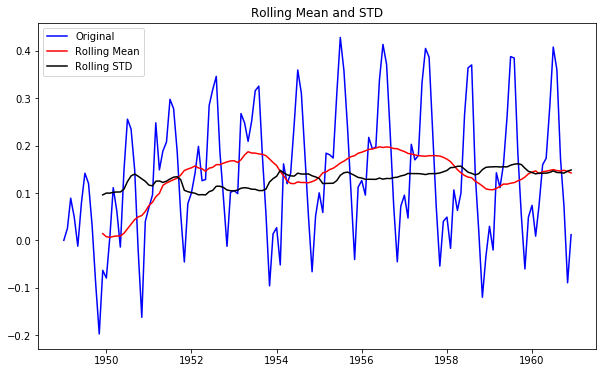

Test Statistics              -3.601262
P-Value                       0.005737
Lags Used                    13.000000
No: of Observations Used    130.000000
Critical Values are 1%       -3.481682
Critical Values are 5%       -2.884042
Critical Values are 10%      -2.578770
dtype: float64


In [55]:
df_logMinusexponentialdecayweightedaverage = df_log - exponentialdecayweightedaverage

test_Stationary(df_logMinusexponentialdecayweightedaverage)

Here we can see that the P-value has become even more lesser than 2.2% as 0.5%. So even more the data has become Stationary than the previous one which we have see from logged data minus the moving average. Even the Rolling mean has become better than the previous one. Andlike before here also no Trend.

So now we know that our data is Stationary. So we will now shift the values into Time Series. So that we can use it in the forecasting.

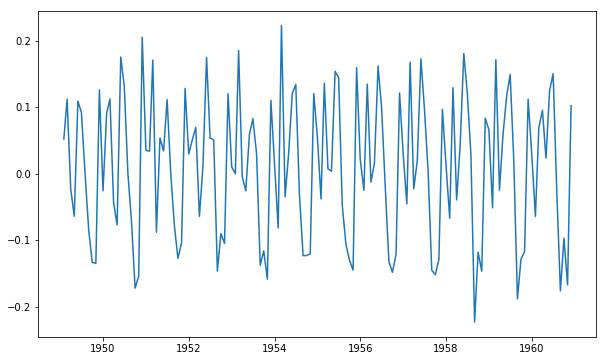

In [56]:
df_logdiffshifting = df_log - df_log.shift()

pll.plot(df_logdiffshifting)

Here we can see that we have shifted the values by 1 or we can say that we have differenced the values by 1. So here we have taken a lag of 1.

As we know that ARIMA model has 3 models as AR(Auto-Regressive), MA(Moving-Average) and I(Intergration). And it has 3 parameters as P(Auto-Regressive lags), Q(Moving Average) and d(Order od Differentiation ie; how many time we have differentiated the time series). So here the values has been becomes 1.

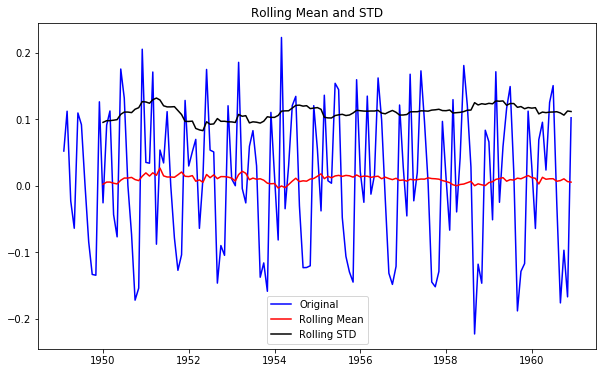

Test Statistics              -2.717131
P-Value                       0.071121
Lags Used                    14.000000
No: of Observations Used    128.000000
Critical Values are 1%       -3.482501
Critical Values are 5%       -2.884398
Critical Values are 10%      -2.578960
dtype: float64


In [57]:
df_logdiffshifting.dropna(inplace=True)
test_Stationary(df_logdiffshifting)

So here we can see that the data has become even more stationary than before even with the moving average and the Standard Devation.

So now we can do the time series forecasting .
We know the components of time series as Trend, Seasonal and the Residuals.
So now let's do the Decomposition part.

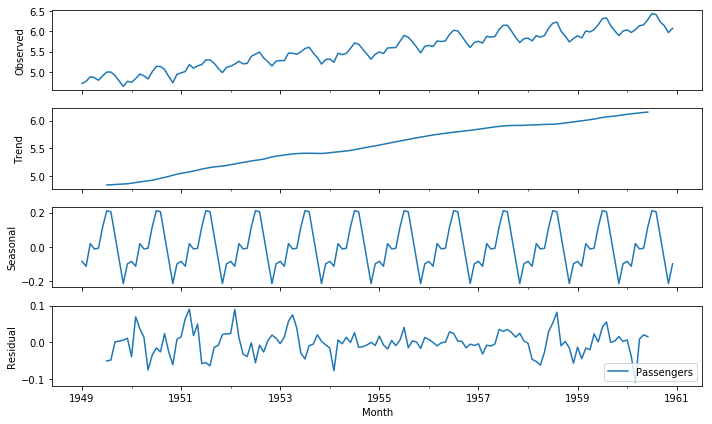

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#pll.plot(df_log, label='DataLogged')
#pll.plot(trend, label='Trend')
#pll.plot(seasonal, label='Seasonal')
#pll.plot(residual, label='Residual')
decomposition.plot()
pll.legend(loc='best')
pll.tight_layout()
pll.show()


Now we will plot the residual and see the Stationarity of the data.

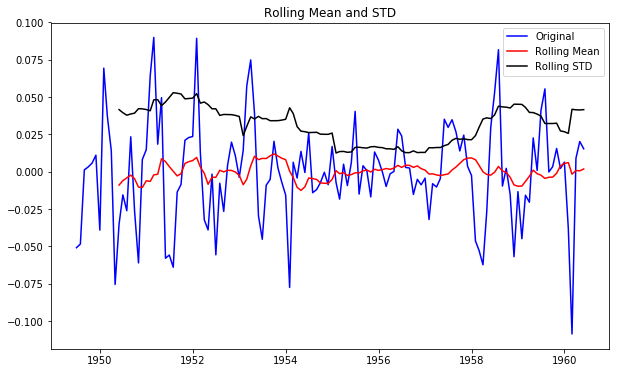

Test Statistics            -6.332387e+00
P-Value                     2.885059e-08
Lags Used                   9.000000e+00
No: of Observations Used    1.220000e+02
Critical Values are 1%     -3.485122e+00
Critical Values are 5%     -2.885538e+00
Critical Values are 10%    -2.579569e+00
dtype: float64


In [63]:
decomposedlogData = residual

decomposedlogData.dropna(inplace=True)
test_Stationary(decomposedlogData)

As we can see this is not Stationary. So that's why we are taking the moving average. So that, It will smoothens it out to predict what will happen next.

So now we know the value of d as 1. As we have shifted or lagged by 1 before. But We have to know the value of P and the value of Q as well. 
So we need to do the test for both as : ACF(Auto Regressive Function) and PACF(Partial Auto Regressive Function)

ACF graph is done for getting the values of Q and
PACF graph is done for getting the values of P

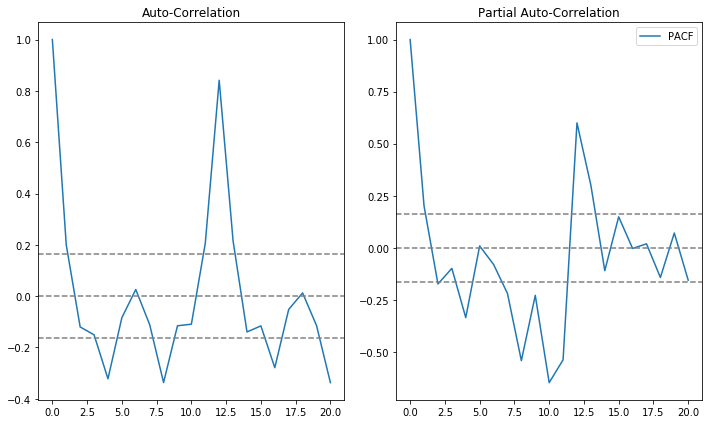

In [71]:
# ACF and PACF plots

from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(df_logdiffshifting, nlags=20)
lag_pacf = pacf(df_logdiffshifting, nlags=20, method='ols')

# Plotting ACF

pll.subplot(121)
pll.plot(lag_acf, label='ACF')
pll.axhline(y=0,linestyle='--',color='gray')
pll.axhline(y=-1.96/np.sqrt(len(df_logdiffshifting)),linestyle='--',color='gray')
pll.axhline(y=1.96/np.sqrt(len(df_logdiffshifting)),linestyle='--',color='gray')
pll.title("Auto-Correlation")

# PLotting PACF

pll.subplot(122)
pll.plot(lag_pacf, label='PACF')
pll.axhline(y=0,linestyle='--',color='grey')
pll.axhline(y=-1.96/np.sqrt(len(df_logdiffshifting)),linestyle='--',color='gray')
pll.axhline(y=1.96/np.sqrt(len(df_logdiffshifting)),linestyle='--',color='gray')
pll.title("Partial Auto-Correlation")
pll.legend(loc='best')
pll.tight_layout()
pll.show()

The P and Q values are taken as by Checking the graph and see where the value first cut's or drops to zero.
From the PACF Graph we can see that the Confidence interval where it touches,we can see that the p-value is almost around 2.
From the ACF Graph, we can see that by looking the same and can find the value of Q as same around 2.

So now we have the values as :
P = 2,
Q = 2,
d = 1

Now we will simply substitue these values in the ARIMA model 

So here we are splitting the AR and MA Model and checking the RSS Score

C:\Users\JH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\JH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\JH\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\JH\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpret

Plotting AR-Model


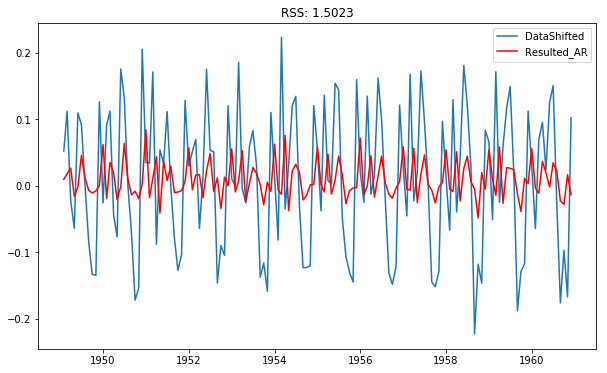

In [103]:
from statsmodels.tsa.arima_model import ARIMA

# AR Model
# AR Model is used for finding the P value
# For AR Model the Q- value will be zero

model = ARIMA(df_log, order=(2,1,0))       #  Order( P, d, Q) values
results_AR = model.fit(disp=-1)

pll.plot(df_logdiffshifting, label='DataShifted')
pll.plot(results_AR.fittedvalues, color='red', label='Resulted_AR')
pll.title("RSS: %.4f"%sum((results_AR.fittedvalues-df_logdiffshifting['Passengers'])**2))
pll.legend(loc='best')
print('Plotting AR-Model')
pll.show()

Always the RSS score should be less. So here it is good RSS Score.

Plotting MA-Model


C:\Users\JH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\JH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


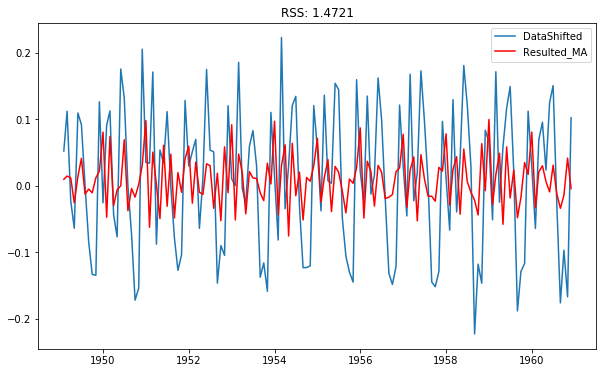

In [104]:
# MA Model
# MA Model is used for finding the P value
# For MA Model the P- value will be zero

model = ARIMA(df_log, order=(0,1,2))       #  Order( P, d, Q) values
results_MA = model.fit(disp=-1)

pll.plot(df_logdiffshifting, label='DataShifted')
pll.plot(results_MA.fittedvalues, color='red', label='Resulted_MA')
pll.title("RSS: %.4f"%sum((results_MA.fittedvalues-df_logdiffshifting['Passengers'])**2))
pll.legend(loc='best')
print('Plotting MA-Model')
pll.show()

So here we have splitted the AR and MA model and are analysing the RSS SCore with different orders by making P and Q as 0 and checking the RSS Score (Residual Sum of Squares).

So here the Combined model of both AR+MA gives the best RSS Score as:

C:\Users\JH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\JH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


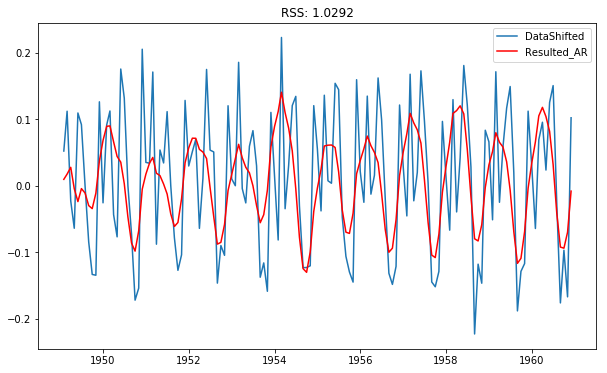

In [78]:
model = ARIMA(df_log, order=(2,1,2))       #  Order( P, d, Q) values
results_ARIMA = model.fit(disp=-1)

pll.plot(df_logdiffshifting, label='DataShifted')
pll.plot(results_ARIMA.fittedvalues, color='red', label='Resulted_AR')
pll.title("RSS: %.4f"%sum((results_ARIMA.fittedvalues-df_logdiffshifting['Passengers'])**2))
pll.legend(loc='best')
pll.show()

So here the Combined RSS (Residual Sum of Squares) is 1.02 which is far better than the others.

Now let's fit in a combined model ie; ARIMA.
So let's do fitting on the time series and see what Data we have.

In [93]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64

In [92]:
# Convert to the Cumulative Sum

predictions_ARIMA_diff_cum = predictions_ARIMA_diff.cumsum()

print(predictions_ARIMA_diff_cum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [94]:
predictions_ARIMA_log = pd.Series(df_log['Passengers'].ix[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cum, fill_value=0)
predictions_ARIMA_log.head()

C:\Users\JH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

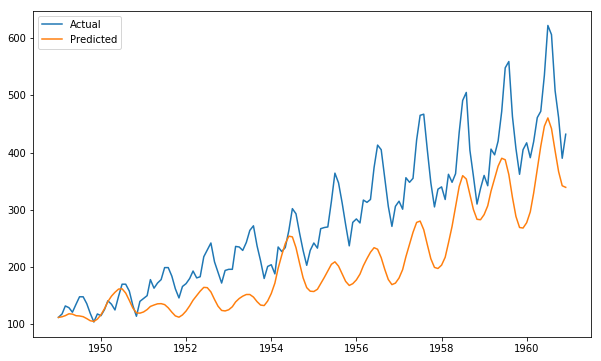

In [97]:
# Doing this inorder to get the data in it's original format

prediction_ARIMA = np.exp(predictions_ARIMA_log)

pll.plot(df, label='Actual')
pll.plot(prediction_ARIMA, label='Predicted')
pll.legend(loc='best')
pll.show()

Here we can see that only the magnitude is varying but the shape isn't properly captured by the ARIMA Model.
Now we need to think about how to predict.
First let me see how many values are there in the data.ie; the shape().

In [98]:
df_log

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


Now I want to predict it for the next 10 years. So what will be my prediction?. So now we have to see how many number of Data Points would we want. 
So we want to predict for next 10 years. Then we have to take 120 Data Points as (12 months*10 years).
For predicting the number of rows we can give the total number rows as 144+120 = 264 rows.
We can provide this value in the plot_predict for predicting the values.

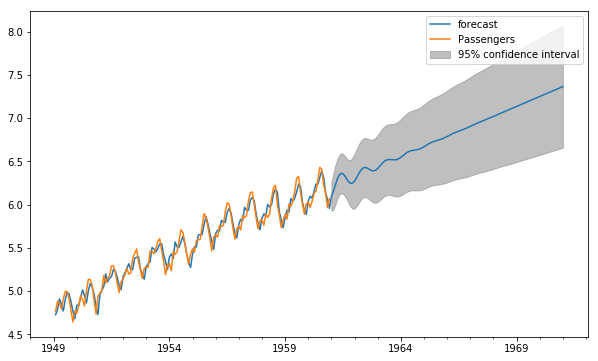

In [99]:
results_ARIMA.plot_predict(1,264)
x = results_ARIMA.forecast(steps=120)

In [102]:
results_ARIMA.forecast(steps=120)

(array([6.09553405, 6.15281423, 6.22442985, 6.29241112, 6.34164716,
        6.3635935 , 6.35784666, 6.33139284, 6.29597525, 6.26447709,
        6.24738331, 6.25025185, 6.27275853, 6.30940327, 6.35151501,
        6.38988653, 6.4172737 , 6.43011037, 6.42906671, 6.41842474,
        6.40456148, 6.39403617, 6.39183091, 6.40019516, 6.41833705,
        6.44295416, 6.46937437, 6.4929398 , 6.51024108, 6.51989019,
        6.52267566, 6.52112378, 6.51864524, 6.51853692, 6.5231193 ,
        6.5332237 , 6.54812878, 6.56591562, 6.58410308, 6.60036534,
        6.61313257, 6.62192771, 6.6273778 , 6.63093123, 6.63438688,
        6.63937988, 6.6469651 , 6.65739847, 6.6701533 , 6.68414253,
        6.69806625, 6.71077897, 6.72157726, 6.73033977, 6.73749805,
        6.74386375, 6.75037323, 6.75782595, 6.76668686, 6.77699827,
        6.78841322, 6.80032854, 6.81207193, 6.82308756, 6.83307132,
        6.84202488, 6.85022309, 6.85811219, 6.8661734 , 6.87479153,
        6.88416305, 6.89426386, 6.90487891, 6.91

In [100]:
x[1]

array([0.08384711, 0.10749461, 0.11568693, 0.11702773, 0.11703495,
       0.11744016, 0.11762248, 0.11778712, 0.12024161, 0.12736039,
       0.13870955, 0.15118786, 0.16157806, 0.16834386, 0.17177319,
       0.17311972, 0.17358722, 0.17385449, 0.17430208, 0.17543322,
       0.17788138, 0.18195712, 0.18726206, 0.19283381, 0.19769231,
       0.20130625, 0.20369041, 0.20519818, 0.20625255, 0.20720985,
       0.20836958, 0.21000313, 0.21229731, 0.21524464, 0.21860165,
       0.22198241, 0.22503049, 0.22755279, 0.2295479 , 0.23114782,
       0.23253809, 0.23390518, 0.23541294, 0.23718296, 0.23926522,
       0.24161521, 0.24410354, 0.2465634 , 0.24885238, 0.25089611,
       0.25269715, 0.2543161 , 0.25584294, 0.2573721 , 0.25898372,
       0.26072832, 0.2626153 , 0.26461071, 0.26664879, 0.26865462,
       0.27056829, 0.27236077, 0.27403682, 0.27562754, 0.2771781 ,
       0.27873507, 0.28033571, 0.28199998, 0.28372662, 0.2854949 ,
       0.2872719 , 0.28902324, 0.29072316, 0.29236062, 0.29394

In [101]:
len(x[1])

120